In [27]:
import numpy as np
from skimage import io, data, transform, util, filters, color
import matplotlib.pyplot as plt

In [28]:
def show(img_list, caption_list, Axis=False):
    n = len(img_list)
    f, ax = plt.subplots(1,n, figsize=(10+5*(n-1),10))
    for i in range(n):
        ax[i].imshow(img_list[i], cmap='gray')
        ax[i].set_title(caption_list[i])
        if not Axis:
            ax[i].set_axis_off()

# Mean images

In [3]:
def NoiseSum(img, n):
    nimg = np.zeros_like(img, dtype='float')
    figs = [None] * n
    for i in range(n):
        tmp = util.random_noise(img, 'gaussian')
        figs[i] = tmp
        nimg += figs[i]
    nimg /= n
    return figs, nimg




(512, 512)


Text(0.5, 1.0, 'Imagem Original')

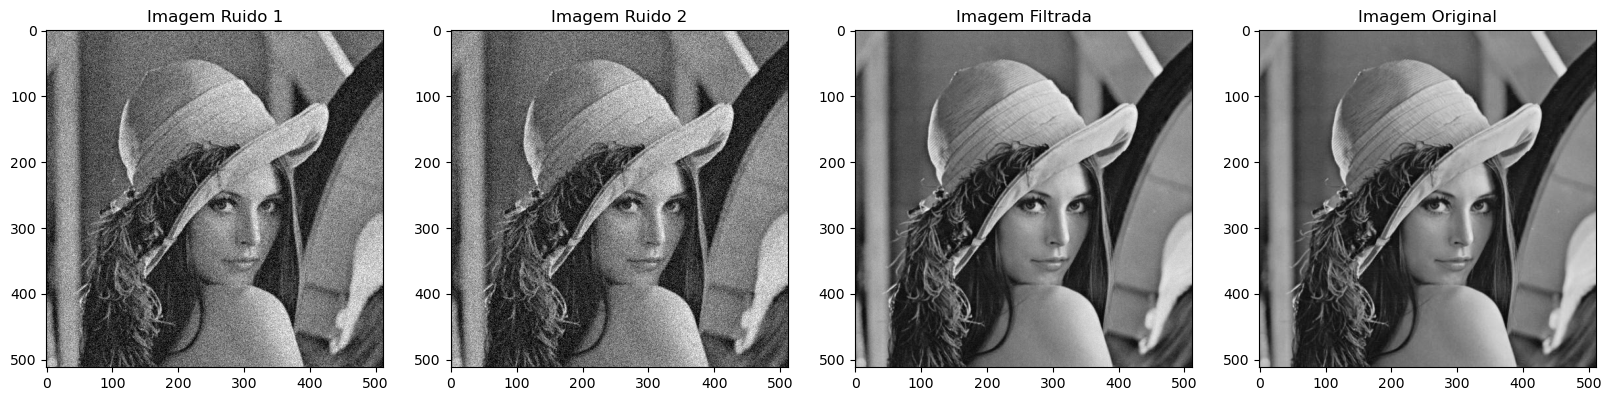

In [4]:
img = io.imread('D:\\Dropbox\\UFOP\\BCC326\\test\\png\\lenna_gray512.png',as_gray=True)
print(img.shape)
figs, nimg = NoiseSum(img, 50)
f, ax = plt.subplots(1,4, figsize=(20,20))
ax[0].imshow(figs[0], cmap='gray')
ax[0].set_title('Imagem Ruido 1')
ax[1].imshow(figs[2], cmap='gray')
ax[1].set_title('Imagem Ruido 2')
ax[2].imshow(nimg, cmap = 'gray')
ax[2].set_title('Imagem Filtrada')
ax[3].imshow(img, cmap = 'gray')
ax[3].set_title('Imagem Original')


# Diferença entre imagens consecutivas

Text(0.5, 1.0, 'Diferença')

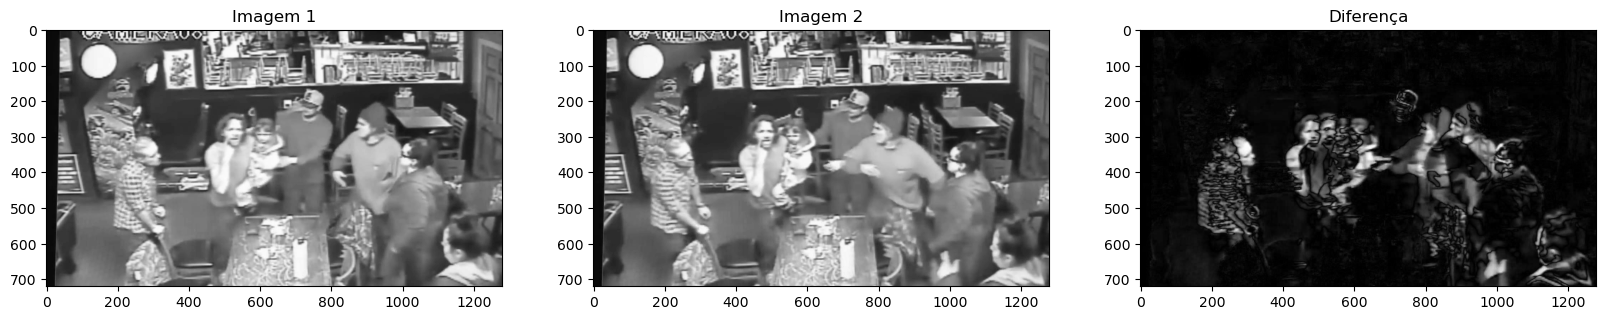

In [29]:
img1 = io.imread('D:\\Dropbox\\UFOP\\BCC326\\test\\png\\img_00002.jpg',as_gray=True)
img2 = io.imread('D:\\Dropbox\\UFOP\\BCC326\\test\\png\\img_00003.jpg',as_gray=True)

dimg = np.abs(img1 - img2)

f, ax = plt.subplots(1,3, figsize=(20,20))
ax[0].imshow(img1, cmap='gray')
ax[0].set_title('Imagem 1')
ax[1].imshow(img2, cmap='gray')
ax[1].set_title('Imagem 2')
ax[2].imshow(dimg, cmap = 'gray')
ax[2].set_title('Diferença')

# Operações Lógicas

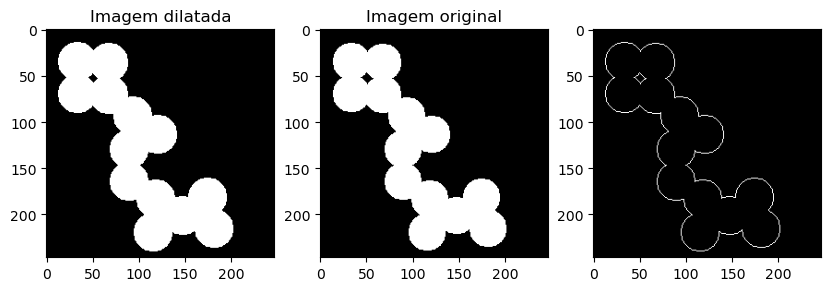

In [30]:
from skimage import morphology
from skimage.util import img_as_bool
img = io.imread('D:\\Dropbox\\UFOP\\BCC326\\test\\png\\coinsd.png',as_gray=True)

img_dil = morphology.binary_dilation(img)
bool_img = img_as_bool(img)

f, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(img_dil, cmap='gray')
ax[0].set_title('Imagem dilatada')
ax[1].imshow(bool_img, cmap='gray')
ax[1].set_title('Imagem original')


nimg = np.logical_and(img_dil, np.logical_not(bool_img) )
ax[2].imshow(nimg, cmap='gray')




#nimg = np.logical_and(img_dil, np.logical_not(bool_img))
#plt.imshow(nimg, cmap='gray')
#plt.imshow(~bool_img, cmap='gray')

# 1D noisy signal and smoothing

In [7]:
from scipy import ndimage, signal

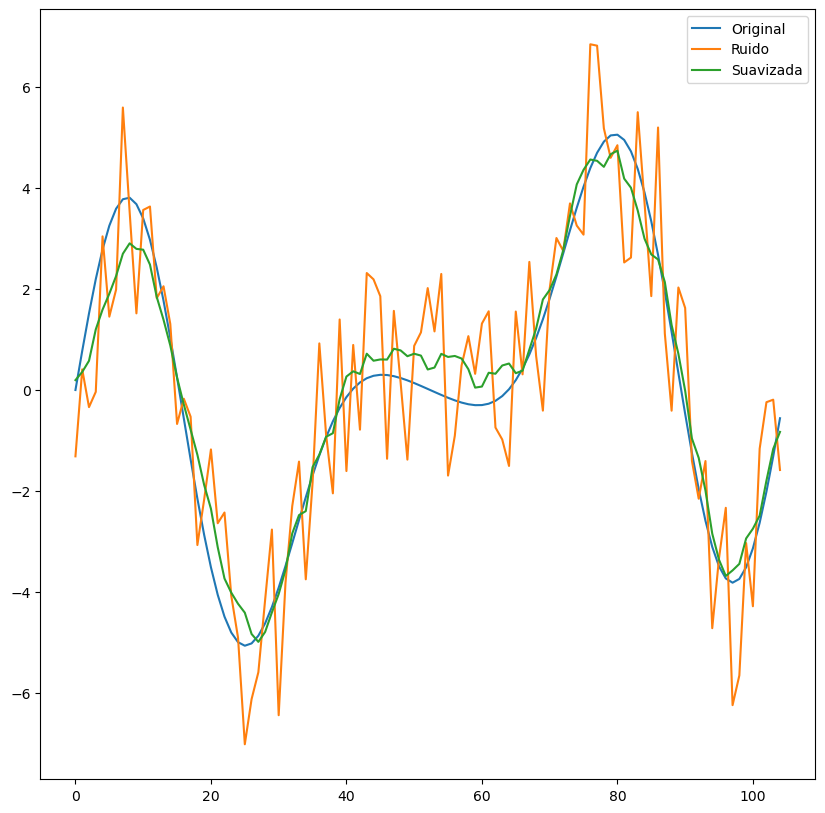

In [32]:
x = np.arange(-np.pi, np.pi, 0.06)
y = 2*np.sin(x) + np.sin(2*x) -3* np.sin(3*x) + np.sin(4*x)
m = np.max(y)
ruido = np.random.random(len(x))*m - m/2
y2 = y+ ruido


plt.figure(figsize=(10,10))
line1, = plt.plot(y, label='Original')
line2, = plt.plot(y2, label='Ruido')


mask = np.ones((9))/9
ny= np.convolve(y2, mask, 'same')

line3, = plt.plot(ny, label='Suavizada')
plt.legend(handles=[line1,line2,line3])

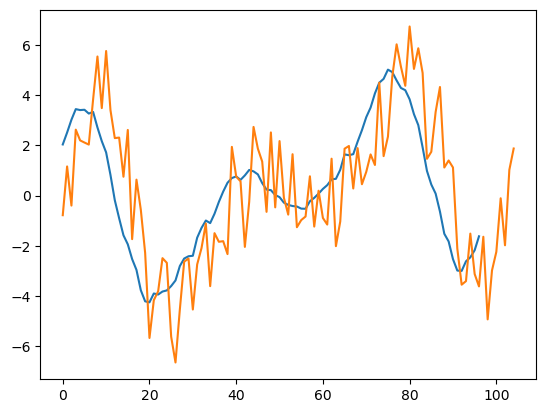

In [9]:
mask = np.ones((9)) * 1/9
new_signal = signal.convolve(y2, mask, mode = 'valid' )
plt.plot(new_signal)
plt.plot(y2)

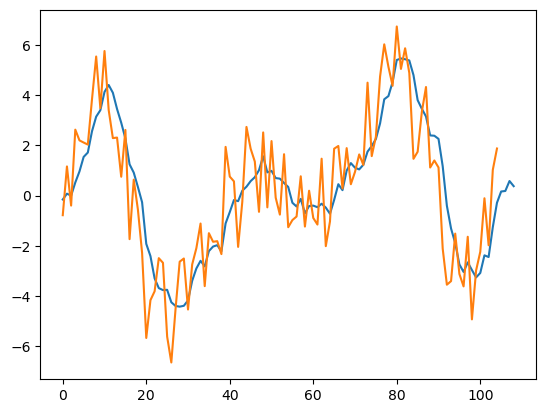

In [10]:
mask = np.ones((5)) * 1/5
new_signal = signal.correlate(y2, mask, mode = 'full' )
plt.plot(new_signal)
plt.plot(y2)

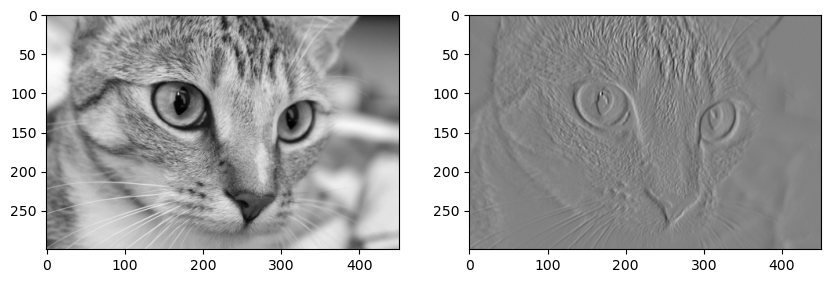

In [34]:
img = data.chelsea()
#mask = np.ones((3,3)) * 1/9
mask = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
nimg = ndimage.convolve(color.rgb2gray(img), mask.T)
f, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(color.rgb2gray(img), cmap='gray')
ax[1].imshow(nimg, cmap='gray')

In [35]:
cat_gray = color.rgb2gray(img)

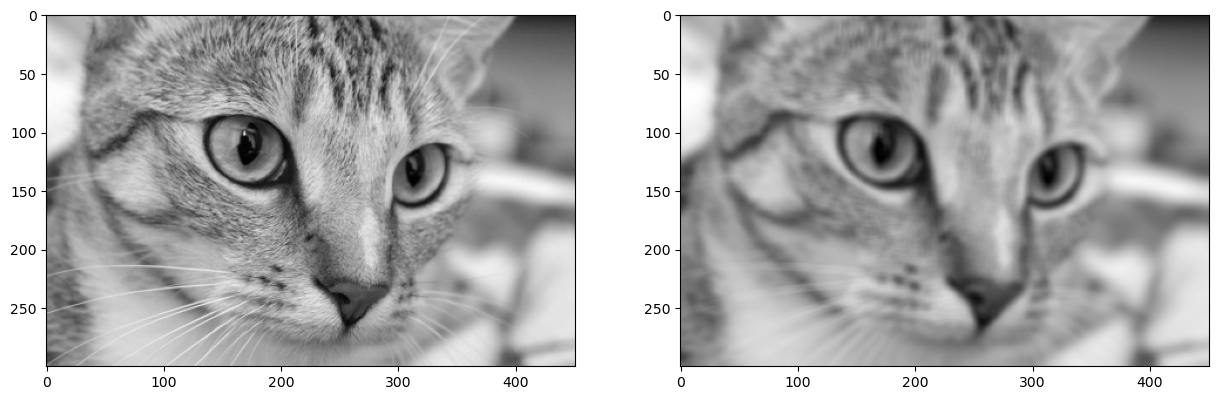

In [41]:
mask = 1/49*np.ones((7,7))
nimg = ndimage.convolve(cat_gray,mask)
f,ax = plt.subplots(1,2, figsize=(15,10))
ax[0].imshow(cat_gray, cmap='gray')
ax[1].imshow(nimg, cmap='gray')

### Gaussiana 1D
$$G(x) = \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{x^2}{2\sigma^2}}$$

In [42]:
def Gauss1D(length=100, sigma = 1):
    x = np.arange(-length, length)
    g = 1 / (np.sqrt(2*np.pi) * sigma) * np.exp(-(x**2 / (2*sigma**2)))
    return g

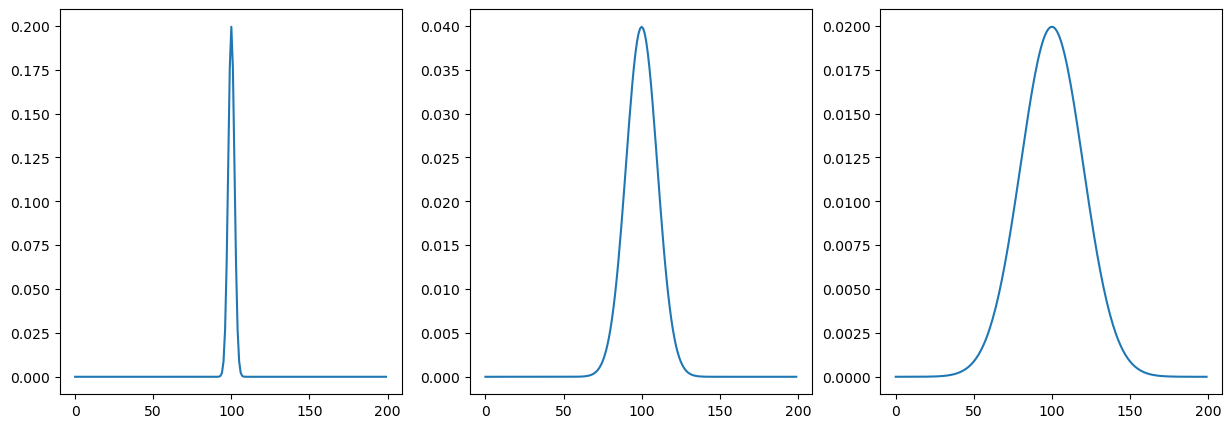

In [45]:
g2 = Gauss1D(sigma=2)
g10 = Gauss1D(sigma=10)
g20 = Gauss1D(sigma=20)

#fig,ax = plt.subplots(1,3,figsize=(15,5))
#ax[0].set_ylim(0,0.250)
#ax[0].plot(g2)
#ax[1].set_ylim(0,0.250)
#ax[1].plot(g10)
#ax[2].set_ylim(0,0.250)
#ax[2].plot(g20)


plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(g2)
plt.subplot(1,3,2)

plt.plot(g10)
plt.subplot(1,3,3)
plt.plot(g20)

### Máscara Gaussiana

In [18]:
m = 3
n = 3
y,x = np.ogrid[-m:m+1,-n:n+1]
print(y)
print(x)
print(x*y)


[[-3]
 [-2]
 [-1]
 [ 0]
 [ 1]
 [ 2]
 [ 3]]
[[-3 -2 -1  0  1  2  3]]
[[ 9  6  3  0 -3 -6 -9]
 [ 6  4  2  0 -2 -4 -6]
 [ 3  2  1  0 -1 -2 -3]
 [ 0  0  0  0  0  0  0]
 [-3 -2 -1  0  1  2  3]
 [-6 -4 -2  0  2  4  6]
 [-9 -6 -3  0  3  6  9]]


In [46]:
def matlab_style_gauss2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    https://stackoverflow.com/questions/17190649/how-to-obtain-a-gaussian-filter-in-python
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    print(h.shape)
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

In [50]:
m =  matlab_style_gauss2D(shape=(51,51), sigma=20)
with np.printoptions(precision = 7, suppress = True):
   print(m)

(51, 51)
[[0.0001311 0.0001393 0.0001478 ... 0.0001478 0.0001393 0.0001311]
 [0.0001393 0.0001481 0.0001571 ... 0.0001571 0.0001481 0.0001393]
 [0.0001478 0.0001571 0.0001666 ... 0.0001666 0.0001571 0.0001478]
 ...
 [0.0001478 0.0001571 0.0001666 ... 0.0001666 0.0001571 0.0001478]
 [0.0001393 0.0001481 0.0001571 ... 0.0001571 0.0001481 0.0001393]
 [0.0001311 0.0001393 0.0001478 ... 0.0001478 0.0001393 0.0001311]]


In [48]:
def mesh(m):
    lin, col = m.shape
    xlin = int(lin/2)
    xcol = int(col/2)
    x, y = np.ogrid[-xlin:xlin+1, -xcol:xcol+1]
    ax = plt.axes(projection='3d')

    print(x.shape)
    print(m.shape)
    #print(x)

    ax.plot_surface(x,y,m, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

(51, 1)
(51, 51)


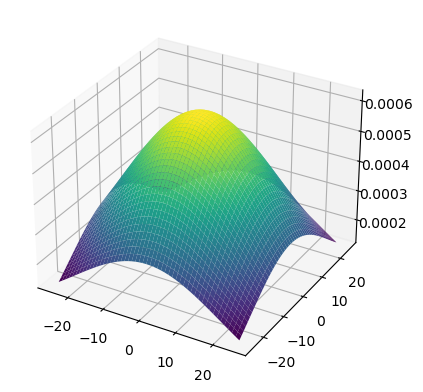

In [51]:
mesh(m)

(51, 51)
(51, 1)
(51, 51)


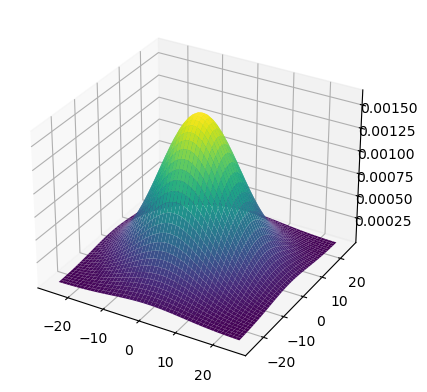

In [73]:
m =  matlab_style_gauss2D(shape=(51,51), sigma=10)
mesh(m)

# Gaussian filter
skimage.filters.gaussian(image, sigma=1, output=None, mode='nearest', cval=0, preserve_range=False, channel_axis=None)
* image: array-like. Input image (grayscale or color) to filter.
* sigma: scalar. Standard deviation for Gaussian kernel. 
* output: array, optional. he output parameter passes an array in which to store the filter output.
* mode{‘reflect’, ‘constant’, ‘nearest’, ‘mirror’, ‘wrap’}
* cval: scalar, optional. Value to fill past edges of input if mode is ‘constant’. Default is 0.0
* preserve_range: bool, optional. If True, keep the original range of values. Otherwise, the input image is converted according to the conventions of img_as_float (Normalized first to values [-1.0 ; 1.0] or [0 ; 1.0] depending on dtype of input)
If None, the image is assumed to be a grayscale (single channel) image. Otherwise, this parameter indicates which axis of the array corresponds to channels.

Text(0.5, 1.0, 'Nearest - default')

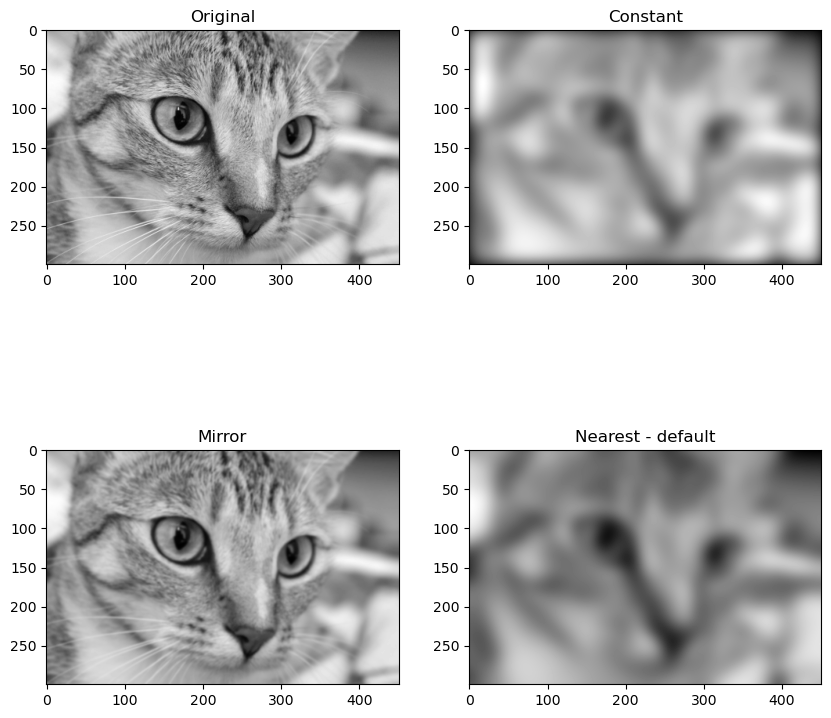

In [52]:
img = data.chelsea()
gimg = color.rgb2gray(img)
fimg1 = filters.gaussian(gimg, sigma=10, cval=0, mode='constant')
fimg2 = filters.gaussian(gimg, sigma=1, mode='mirror')
fimg3 = filters.gaussian(gimg, sigma=10, mode='nearest')
f, ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].imshow(gimg, cmap='gray')
ax[0,0].set_title('Original')
ax[0,1].imshow(fimg1, cmap='gray')
ax[0,1].set_title('Constant')
ax[1,0].imshow(fimg2, cmap='gray')
ax[1,0].set_title('Mirror')
ax[1,1].imshow(fimg3, cmap='gray')
ax[1,1].set_title('Nearest - default')


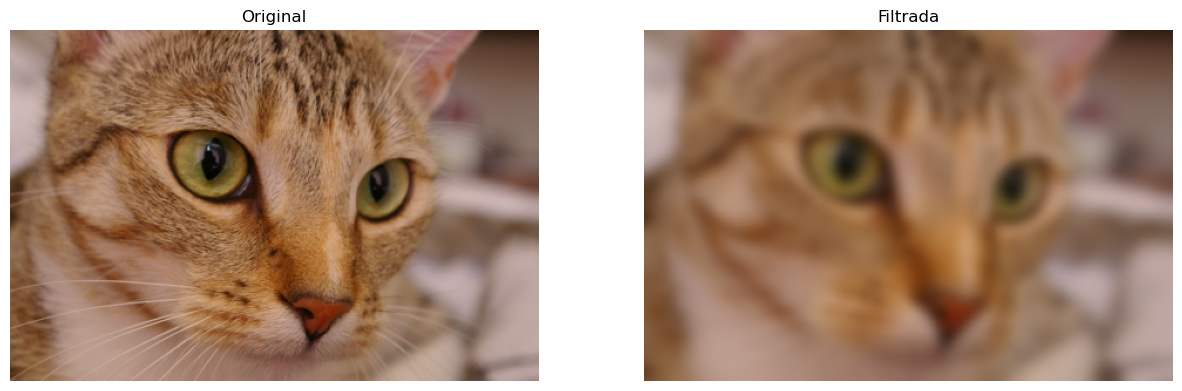

In [54]:
fimg4 = filters.gaussian(img, sigma=5, mode='nearest', channel_axis=2)
show([img, fimg4], ['Original', 'Filtrada'])

# Gaussian filter - Scipy

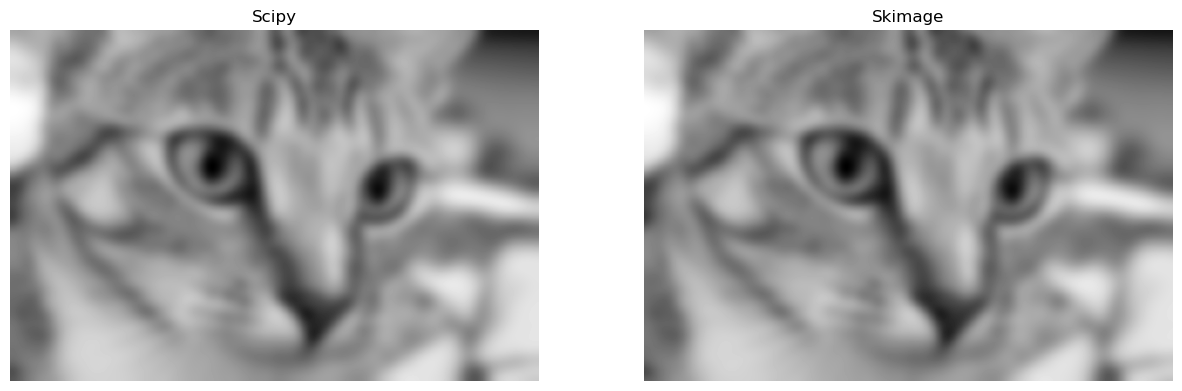

In [56]:
img = data.chelsea()
gimg = color.rgb2gray(img)
nimg = ndimage.gaussian_filter(gimg, sigma=5)
#f, ax = plt.subplots(1,2, figsize=(10,10))
#ax[0].imshow(gimg, cmap='gray')
#ax[0].set_title('Original')
#ax[1].imshow(nimg, cmap='gray')
#ax[1].set_title('Gaussian filter')
fimg2 = filters.gaussian(gimg, sigma=5)
show([nimg, fimg2], ['Scipy', 'Skimage'])

# Unsharp masking

Text(0.5, 1.0, 'Unsharp')

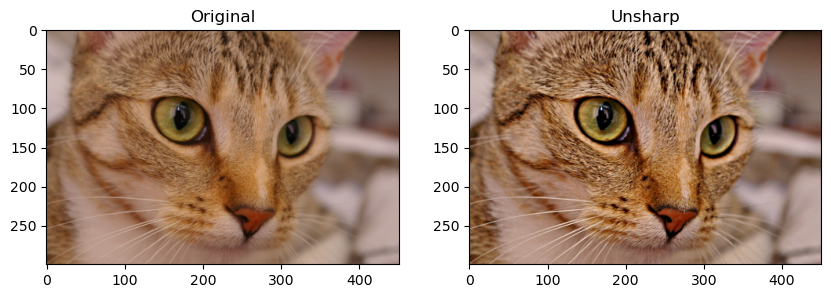

In [57]:
nimg = filters.unsharp_mask(img, radius=4, amount=1.0, channel_axis=2)
f, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(img)
ax[0].set_title('Original')
ax[1].imshow(nimg)
ax[1].set_title('Unsharp')

Text(0.5, 1.0, 'Unsharp')

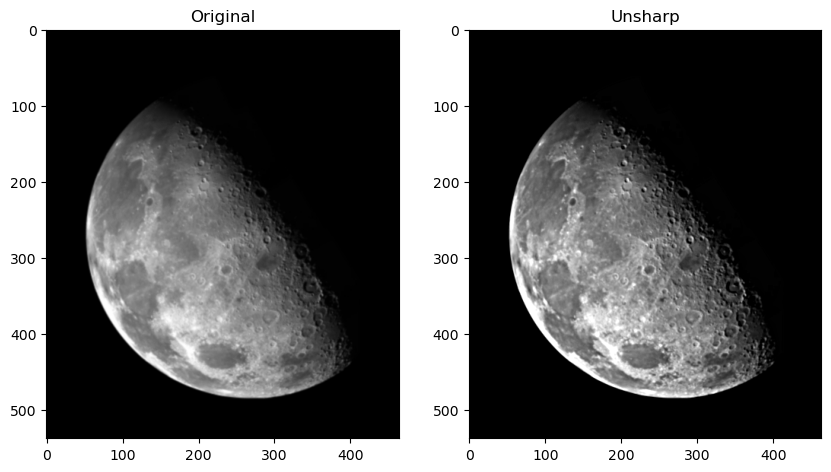

In [58]:
lua = io.imread('D:\\Dropbox\\UFOP\\BCC326\\test\\png\\lua.png', as_gray=True)
lua_sharp = filters.unsharp_mask(lua, radius=4, amount=1.0)
f, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(lua, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(lua_sharp, cmap='gray')
ax[1].set_title('Unsharp')

# Equivalent to colfilt

In [43]:
from skimage import util

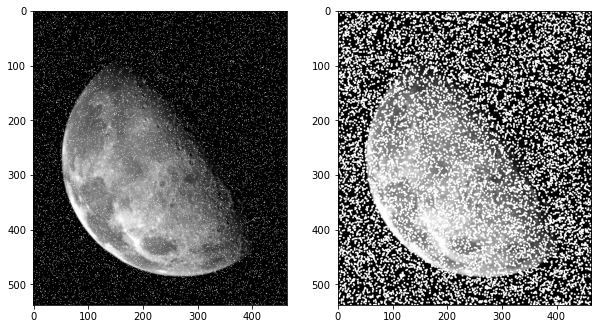

In [45]:
footprint = np.ones( (3,3) )
lua2 = util.random_noise(lua, mode = 'salt')
nimg5 = ndimage.generic_filter(lua2, np.max, footprint=footprint)
f, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(lua2, cmap='gray')
ax[1].imshow(nimg5, cmap='gray')

# Gaussian mask

In [13]:
def gaussian_mask(shape=(3,3), sigma=0.5):
    lin, col = [(ss-1.)/2. for ss in shape]
    x, y = np.ogrid[-lin:lin+1, -col:col+1]
    arg = -(x*x + y*y)/(2*sigma*sigma)
    h = np.exp(arg) /  (2*sigma*sigma*np.pi)

    return h

In [16]:
def gaussian_mask2(shape=(3,3), sigma = 0.5):
    lin, col = [(ss-1.)/2. for ss in shape]
    I = np.arange(-lin, lin+1)
    J = np.arange(-col, col+1)
    
    i, j = np.meshgrid(I, J, indexing='ij')
    arg =  (i**2 + j**2)/(2*sigma**2)
    h = np.exp(-arg) / (2*sigma*sigma*np.pi)
    return h

In [23]:
from scipy import signal

In [24]:
def gaussian_mask3(kernlen=21, std=3):
    """Returns a 2D Gaussian kernel array."""
    gkern1d = signal.gaussian(kernlen, std=std).reshape(kernlen, 1)
    gkern2d = np.outer(gkern1d, gkern1d)
    return gkern2d

In [29]:
def gaussian_mask4(shape=(3,3), std=3):
    """Returns a 2D Gaussian kernel array."""
    gkern1d_1 = signal.gaussian(shape[0], std=std).reshape(shape[0], 1)
    gkern1d_2 = signal.gaussian(shape[1], std=std).reshape(shape[1], 1)
    gkern2d = np.outer(gkern1d_1, gkern1d_2)
    return gkern2d

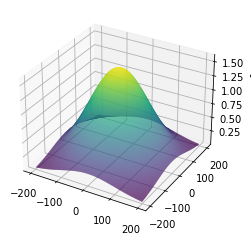

In [22]:
shape = (500,500)
lin, col = [(ss-1.)/2. for ss in shape]
h2 = gaussian_mask2(shape, sigma=100)

x, y = np.ogrid[-lin:lin+1, -col:col+1]
ax = plt.axes(projection='3d')

ax.plot_surface(x,y,h2, rstride=1, cstride=1, cmap='viridis', edgecolor='none');

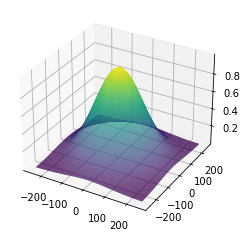

In [30]:
shape = (500,500)
lin, col = [(ss-1.)/2. for ss in shape]
h2 = gaussian_mask4(shape, std=100)

x, y = np.ogrid[-lin:lin+1, -col:col+1]
ax = plt.axes(projection='3d')

ax.plot_surface(x,y,h2, rstride=1, cstride=1, cmap='viridis', edgecolor='none');

In [2]:
imgg = io.imread('C:\\Users\\memo\\Downloads\\vintage-library-with-books-and-ladder.jpg')

C:\Users\memo\AppData\Local\Temp\ipykernel_19824\2740556853.py:1: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fimg1 = filters.gaussian(imgg, sigma=10, cval =0, mode='constant', multichannel=False)
c:\ProgramData\Anaconda3\lib\site-packages\skimage\_shared\utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


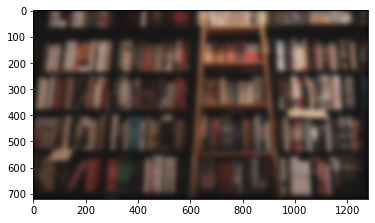

In [6]:
fimg1 = filters.gaussian(imgg, sigma=10, cval =0, mode='constant', multichannel=False)
plt.imshow(fimg1)
io.imsave('fondo.png', fimg1)

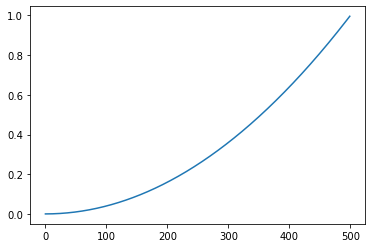

In [4]:
t = 4 * np.arange(0,0.5, 0.001)**2
plt.plot(t)